In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

## Let's make a binary classification dataset

We will let scikit generate it for us

In [2]:
X, y = make_classification(
    n_samples=100, n_features=3, n_redundant=0, n_clusters_per_class=1, random_state=2)

In [3]:
# Turn it into a pandas dataframe just causet it's a bit easier
X = pd.DataFrame(X, columns=['feature 1', 'feature 2', 'feature 3'])

<IPython.core.display.Javascript object>


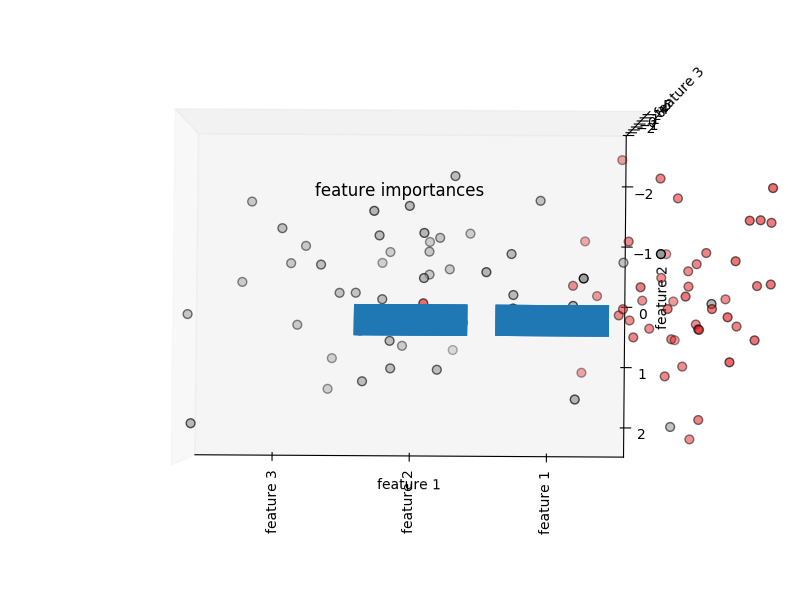

In [46]:
# Take a 3d look at it
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X['feature 1'], X['feature 2'], X['feature 3'], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Data set generated by scikit")
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 3")

plt.show()

<IPython.core.display.Javascript object>


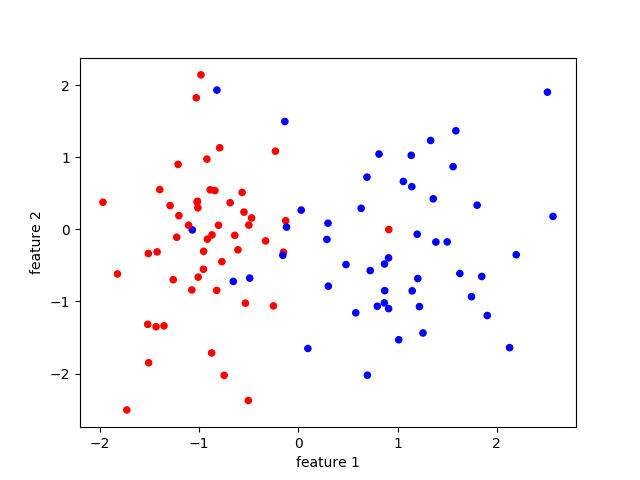

In [5]:
# Looks like feature 1 does a pretty good job compared to feature 2
X.plot.scatter('feature 1', 'feature 2', c=pd.Series(y).map({0: 'r', 1: 'b'}))

<IPython.core.display.Javascript object>


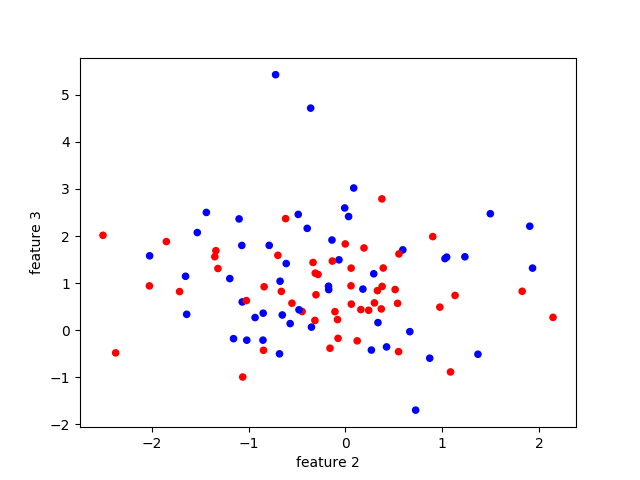

In [6]:
# Now let's check out what it looks like to plot feature 2 vs feature 3
# really not much going on here, doesn't look like either of these features
# split up the dataset very well.
X.plot.scatter('feature 2', 'feature 3', c=pd.Series(y).map({0: 'r', 1: 'b'}))

<IPython.core.display.Javascript object>


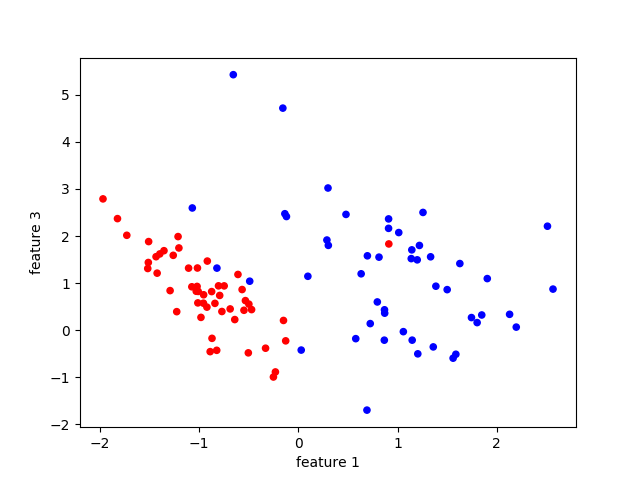

In [37]:
# alright, looks like feature 1 cuts up the space pretty well and feature
# 3 doesn't seem to be doing much
X.plot.scatter('feature 1', 'feature 3', c=pd.Series(y).map({0: 'r', 1: 'b'}))

## Now let's take a look at the logit

The logistic regression is a parametric model very similar to a linear regression.
It learns how best to divide a space using a flat plane between the two classes.

It has difficulty learning non-linear relationships. What this means is that
if you can divide two classes with a nice and clean line, the logit will do
quite well.

If there are more than one cluster per feature or there are complex interactions
between sets of features, it has a more difficult time.

However, they can generalize quite well and if your data is normally distributed
it can be a very good option.

We will go into these concepts in more depth later on.

In [8]:
# Let's do nothing special, just fit with all defaults
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### The coefficients that it learns

These coefficients can tell us a bit about how much the model is relying
on each of the features by looking at the magnitude of them

<IPython.core.display.Javascript object>


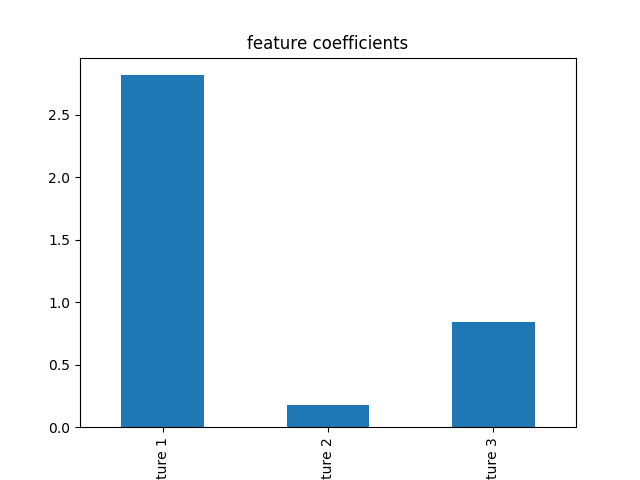

In [10]:
pd.Series(np.abs(clf.coef_[0]), index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature coefficients')

Okay so what we've seen here is that the logistic seems to be relying on feature 1 more than the others

Now take a look at what happens when we mess with one of the hyper-parameters which has
to do with how much you penalize the a feature for not adding as much descriminitory power
relatively as the others.

As you can see, it relies (in some sense) mreo on feature 1 and less on the others.

<IPython.core.display.Javascript object>


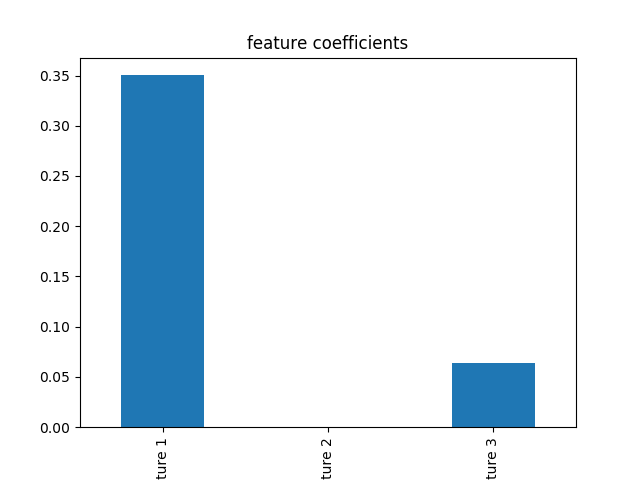

In [20]:
clf = LogisticRegression(C=0.01)
clf.fit(X, y)
pd.Series(np.abs(clf.coef_[0]), index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature coefficients')

And that's what you're doing with a logistic regression. Selecting hyper-parameters 
to tune a model that learns a set of betas in a deterministic way to divide
up a space into two classes.

# Look at the Decision Tree

A Decision tree is a non-parametric model that will learn how to ask yes or no questions about
the data to recursively split up the dataset into smaller and smaller subsets that
are more like each other.

In [30]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Now check out the feature importances

This is a measure of how well the decision tree is able to use a feature to divide up the space.
If a feature has a high importance, then a clean split will be able to be made that divides
the space in an effective way.

<IPython.core.display.Javascript object>


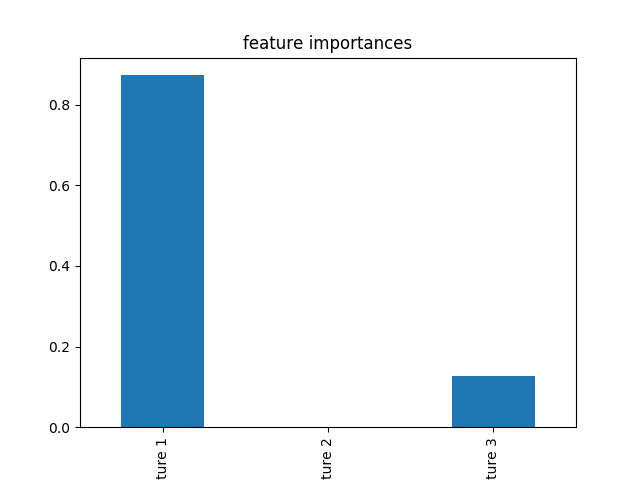

In [28]:
pd.Series(clf.feature_importances_, index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature importances')

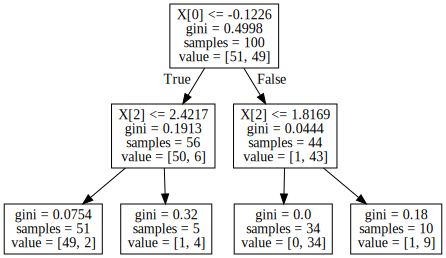

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In the first model, we restricted the number of times the classifier was allowed to split
the space. So now, what we are going to do is allow it to split the dataset more times by
tweaking one of the hyper parameters called `max_depth`.

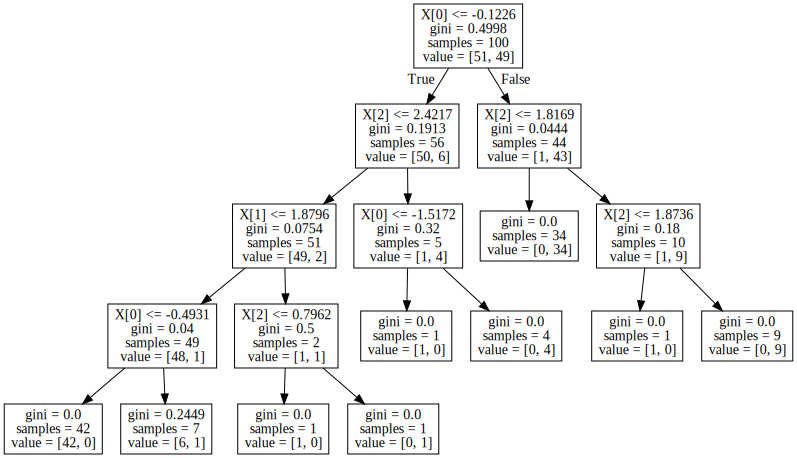

In [32]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In summary, this is what you do when working with a decision tree classifier: messing with
how many times and how the model is allowed to split the data into smaller subsets.

## Look at k-nearest neighbors classifier

This one is a classic and works in a very intutive way! What it does is implement a simple voting mechanism
that compares a new observation to the "nearest" labeled observations in the training set.

In [49]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Great, now what we've got is a nearest neighbors classifier that just looks at the ONE nearest neighbor
to it. As you might remember, there is one outlier in the dataset and he is around the point:

(1, 0, 2)

So if we try to make a prediction about a new point that is near to this guy, he will be
classified as a "0" even though he is completely surrounded by "1s".

In [66]:
clf.predict([
    [1, 0, 2],
    [1.5, 0, 2],
    [1, 0, 2.5],
])

array([0, 1, 1])

As you can see, if you move around even a tiny little bit on the feature 1 or feature 2 space
the prediction switches from "0" to "1". So let's try to fix this up a bit by allowing it to
look at more neighbors when classifying a new point.

In [67]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
clf.predict([
    [1, 0, 2],
    [1.5, 0, 2],
    [1, 0, 2.5],
])

array([1, 1, 1])

There we go, now things are a bit more consistent for the space around it.

And this is the KNN in a nutshell, it has to do with how many of what type are
near to the obvervation that you are considering.

Note that in order to find which nodes are closest to it, it must store the training
set in a way that is efficient to search. These are mostly for performance tuning.

## Random Forest Classifier

A good ol' Swiss Army Knife classic! A Random Forest is quite a simple classifier once you
have wrapped your head around the Decision Tree because, like a forest, it is made up
of a bunch of trees! How it creates these trees is very random at a few different levels
but we won't be going into that today (mostly because I'm not qualified to explain it 😬 )

However, the important bits are that each of the trees will see a subset of the features
as well as a subset of the data. This provides each of the trees to get a different
"perspective" on what kinds of patterns might be found in different parts of the dataset.

Much like the Nearest Neighbors classifier, it uses a voting mechanism amongst it's trees
to determine the class of an observation. However, rather than using the neighbors to gather
opinions, it uses a bunch of trees (e.g. forest).

Alright, let's create a RandomForestClassifier that isn't all that randomy or foresty.



In [99]:
clf = RandomForestClassifier(n_estimators=1, max_depth=1, random_state=1)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Okay so where are all of the trees? They are in the `.estimators_` attribute of
the fitted model.

In [100]:
print('We have {} trees in this forest'.format(len(clf.estimators_)))
clf.estimators_

We have 1 trees in this forest


[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1791095845, splitter='best')]

Alright, let's make things a bit more foresty now

In [101]:
clf = RandomForestClassifier(n_estimators=2, max_depth=1, random_state=1)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [102]:
print('We have {} trees in this forest'.format(len(clf.estimators_)))
clf.estimators_

We have 2 trees in this forest


[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1791095845, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=2135392491, splitter='best')]

Getting the idea now? Okay so let's take a look at one of the trees
just so we can confirm to ourselves that they do indeed exist in the
same way that we saw in the DecisionTreeClassifier.

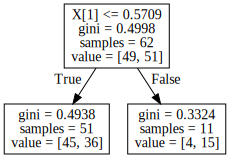

In [103]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None) 
graph = graphviz.Source(dot_data) 
graph

You know what else we have? Feature importances! We can see them globally for all features.

In [104]:
pd.Series(clf.feature_importances_, index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature importances')

We can see them for just one of the classifiers.

In [105]:
pd.Series(clf.estimators_[0].feature_importances_, index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature importances')

And the other classifier as well!

<IPython.core.display.Javascript object>


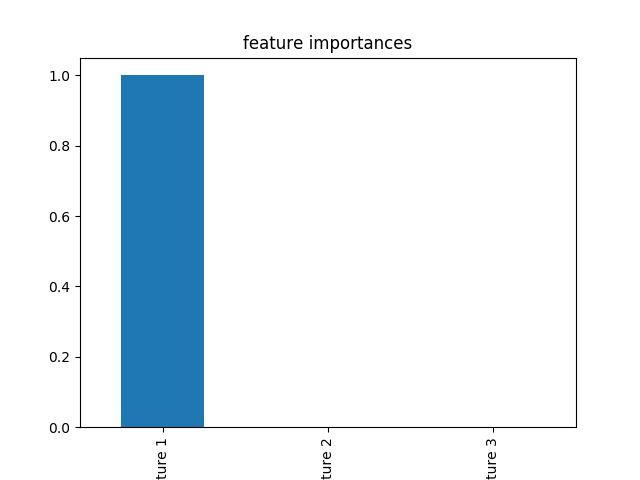

In [106]:
pd.Series(clf.estimators_[1].feature_importances_, index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature importances')

So as you can see, working with a Random Forest in scikit is about letting
a bunch of trees learn how to make splits using different subsets of the
data. You won't be able to visualize all of these trees because in 